#  Classification Algorithms in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
#%pip install mplfinance
import mplfinance as fplt
import os

## Understanding Business Question

## Read Data from Yahoo Finance API

In [3]:
data = pd.read_csv('weekly.csv')

## Data Visualization of Financial Data

In [222]:
#%pip install ta
#import ta

In [45]:
#Simple Moving Average(SMA)
# https://www.investopedia.com/terms/s/sma.asp
sma = ta.trend.sma_indicator(data['Volume'], 20)

In [16]:
sma.head(21)

Date
2017-01-03            NaN
2017-01-04            NaN
2017-01-05            NaN
2017-01-06            NaN
2017-01-09            NaN
2017-01-10            NaN
2017-01-11            NaN
2017-01-12            NaN
2017-01-13            NaN
2017-01-17            NaN
2017-01-18            NaN
2017-01-19            NaN
2017-01-20            NaN
2017-01-23            NaN
2017-01-24            NaN
2017-01-25            NaN
2017-01-26            NaN
2017-01-27            NaN
2017-01-30            NaN
2017-01-31    2275.115979
2017-02-01    2276.201978
Name: sma_20, dtype: float64

In [46]:
sma.tail()

1084    4.063659
1085    4.051404
1086    4.064144
1087    4.073280
1088    4.010463
Name: sma_20, dtype: float64

## Data Preparation¶
 

In [53]:
#data['rsi'] = rsi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
 9   rsi        1087 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 85.2+ KB


In [141]:
import datetime as dt
df = pd.DataFrame({'date':pd.date_range(start='1/1/1990',end='31/12/2010',freq='W')})
df["week"]=df['date'].dt.isocalendar().week
df["Year"]=df['date'].dt.isocalendar().year

df.drop([0,1,2,3,4],inplace=True)
#data.shape,df.shape
df.reset_index(drop=True,inplace=True)
total=pd.merge(data,df,left_index=True,right_index=True)
total.shape
#total.head()
total.to_csv('total.csv')

C:\Users\nasib\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31/12/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
data=pd.read_csv('total.csv')
data.head()

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change
date,,,,,,,,,,,
1990-02-11,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,6,0
1990-02-18,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,7,0
1990-02-25,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,8,0
1990-03-04,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,9,0
1990-03-11,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,10,0


In [16]:
for i in range(1, data.shape[0]):
    data.iloc[i, 10] = data.iloc[i, 6] / data.iloc[i - 1, 6] - 1
data.head()

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change
date,,,,,,,,,,,
1990-02-11,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,6,0.000000
1990-02-18,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,7,-0.041310
1990-02-25,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,8,0.075811
1990-03-04,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,9,0.011215
1990-03-11,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,10,-0.048889


<AxesSubplot:xlabel='date'>

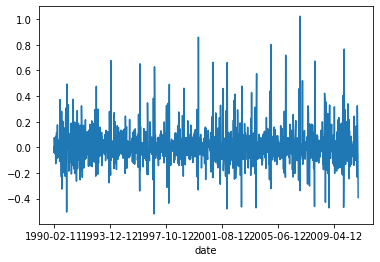

In [17]:
#Plot daily return
data['volume_change'].plot()

<AxesSubplot:xlabel='Today', ylabel='Probability'>

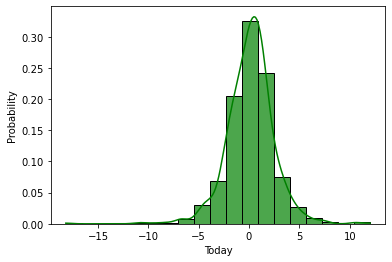

In [160]:
#Plot daily return
sns.histplot(data['Today'], stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(data.Today), max(data.Today), 20))

In [ ]:
#daily return lags: lag 1
data['r_lag1'] = data['d_return'].shift(1)
#data.head()

In [ ]:
#daily return lags: lag 2
data['r_lag2'] = data['d_return'].shift(2)

In [ ]:
#daily return lags: lag 3
data['r_lag3'] = data['d_return'].shift(3)

In [ ]:
#daily return lags: lag 4
data['r_lag4'] = data['d_return'].shift(4)

In [37]:
#daily return lags: lag 5
data['r_lag5'] = data['d_return'].shift(5)
data.head(10)

,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5
Date,,,,,,,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,2257.830078,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,2270.750000,NaN,0.005722,-0.001496,0.000000,NaN,NaN,NaN,NaN
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,2269.000000,100.000000,-0.000771,-0.000815,0.005722,0.000000,NaN,NaN,NaN
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,2276.979980,100.000000,0.003517,-0.112161,-0.000771,0.005722,0.000000,NaN,NaN
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,2268.899902,100.000000,-0.003549,-0.036612,0.003517,-0.000771,0.005722,0.000000,NaN
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,2268.899902,63.998708,0.000000,0.130898,-0.003549,0.003517,-0.000771,0.005722,0.000000
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,2275.320068,55.349648,0.002830,-0.005051,0.000000,-0.003549,0.003517,-0.000771,0.005722
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,2270.439941,69.412265,-0.002145,-0.043719,0.002830,0.000000,-0.003549,0.003517,-0.000771
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,2274.639893,76.428044,0.001850,-0.110007,-0.002145,0.002830,0.000000,-0.003549,0.003517


In [26]:
#volume change lag: lag 1
data['v_lag1'] = data['volume_change'].shift(1)
data.head()

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change,v_lag2,v_lag3,v_lag4,v_lag5,trend,v_lag1
date,,,,,,,,,,,,,,,,,
1990-03-25,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up,12,-0.017625,-0.048889,0.011215,0.075811,-0.041310,1,NaN
1990-04-01,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up,13,-0.127945,0.004658,-0.048889,0.011215,0.075811,1,-0.017625
1990-04-08,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up,14,0.088141,-0.017625,0.004658,-0.048889,0.011215,1,-0.127945
1990-04-15,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down,15,-0.071799,-0.127945,-0.017625,0.004658,-0.048889,0,0.088141
1990-04-22,1990,-2.678,1.253,0.041,0.807,-1.372,0.149024,-1.793,Down,16,0.115157,0.088141,-0.127945,-0.017625,0.004658,0,-0.071799


In [19]:
#volume change lag: lag 2
data['v_lag2'] = data['volume_change'].shift(2)

In [20]:
#volume change lag: lag 3
data['v_lag3'] = data['volume_change'].shift(3)

In [21]:
#volume change lag: lag 4
data['v_lag4'] = data['volume_change'].shift(4)

In [22]:
#volume change lag: lag 5
data['v_lag5'] = data['volume_change'].shift(5)
data.head(10)

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change,v_lag2,v_lag3,v_lag4,v_lag5
date,,,,,,,,,,,,,,,
1990-02-11,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,6,0.000000,NaN,NaN,NaN,NaN
1990-02-18,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,7,-0.041310,NaN,NaN,NaN,NaN
1990-02-25,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,8,0.075811,0.000000,NaN,NaN,NaN
1990-03-04,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,9,0.011215,-0.041310,0.000000,NaN,NaN
1990-03-11,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,10,-0.048889,0.075811,-0.041310,0.000000,NaN
1990-03-18,1990,1.178,0.712,3.514,-2.576,-0.270,0.154444,-1.372,Down,11,0.004658,0.011215,0.075811,-0.041310,0.000000
1990-03-25,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up,12,-0.017625,-0.048889,0.011215,0.075811,-0.041310
1990-04-01,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up,13,-0.127945,0.004658,-0.048889,0.011215,0.075811
1990-04-08,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up,14,0.088141,-0.017625,0.004658,-0.048889,0.011215


In [38]:
#Market trend
#This method is good for complex conditions(here we have simple conditions!)
#create a list of conditions
conditions = [data['Direction'] =='Down',
              data['Direction'] =='Up']

#create a list of the values needed to assign for each condition
values = [0, 1]

#create a new column and use np.select to assign values to it using the lists as arguments
data['trend'] = np.select(conditions, values)
data.head(10)

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change,v_lag2,v_lag3,v_lag4,v_lag5,trend,v_lag1
date,,,,,,,,,,,,,,,,,
1990-03-25,1990,-1.372,1.178,0.712,3.514,-2.576,0.151722,0.807,Up,12,-0.017625,-0.048889,0.011215,0.075811,-0.041310,1,NaN
1990-04-01,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up,13,-0.127945,0.004658,-0.048889,0.011215,0.075811,1,-0.017625
1990-04-08,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up,14,0.088141,-0.017625,0.004658,-0.048889,0.011215,1,-0.127945
1990-04-15,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down,15,-0.071799,-0.127945,-0.017625,0.004658,-0.048889,0,0.088141
1990-04-22,1990,-2.678,1.253,0.041,0.807,-1.372,0.149024,-1.793,Down,16,0.115157,0.088141,-0.127945,-0.017625,0.004658,0,-0.071799
1990-04-29,1990,-1.793,-2.678,1.253,0.041,0.807,0.135790,2.820,Up,17,-0.088804,-0.071799,0.088141,-0.127945,-0.017625,1,0.115157
1990-05-06,1990,2.820,-1.793,-2.678,1.253,0.041,0.139898,4.022,Up,18,0.030253,0.115157,-0.071799,0.088141,-0.127945,1,-0.088804
1990-05-13,1990,4.022,2.820,-1.793,-2.678,1.253,0.164342,0.750,Up,19,0.174727,-0.088804,0.115157,-0.071799,0.088141,1,0.030253
1990-05-20,1990,0.750,4.022,2.820,-1.793,-2.678,0.175648,-0.017,Down,20,0.068796,0.030253,-0.088804,0.115157,-0.071799,0,0.174727


In [39]:
#remove first 6 rows
data.drop(index = data.index[list(range(6))], inplace = True)
data.head()

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change,v_lag2,v_lag3,v_lag4,v_lag5,trend,v_lag1
date,,,,,,,,,,,,,,,,,
1990-04-01,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up,13,-0.127945,0.004658,-0.048889,0.011215,0.075811,1,-0.017625
1990-04-08,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up,14,0.088141,-0.017625,0.004658,-0.048889,0.011215,1,-0.127945
1990-04-15,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down,15,-0.071799,-0.127945,-0.017625,0.004658,-0.048889,0,0.088141
1990-04-22,1990,-2.678,1.253,0.041,0.807,-1.372,0.149024,-1.793,Down,16,0.115157,0.088141,-0.127945,-0.017625,0.004658,0,-0.071799
1990-04-29,1990,-1.793,-2.678,1.253,0.041,0.807,0.135790,2.820,Up,17,-0.088804,-0.071799,0.088141,-0.127945,-0.017625,1,0.115157


## Correlation Analysis¶ 

In [25]:
#corr btw daily return and rsi & d_return lags
corr_table1 = round(data.iloc[:, [1,2,3,4,5,6,7]].corr(method = 'pearson'), 2)
corr_table1

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.00,-0.07,0.06,-0.07,-0.01,-0.06,-0.07
Lag2,-0.07,1.00,-0.07,0.06,-0.07,-0.08,0.06
Lag3,0.06,-0.07,1.00,-0.07,0.06,-0.07,-0.07
Lag4,-0.07,0.06,-0.07,1.00,-0.08,-0.06,-0.01
Lag5,-0.01,-0.07,0.06,-0.08,1.00,-0.06,0.01
Volume,-0.06,-0.08,-0.07,-0.06,-0.06,1.00,-0.03
Today,-0.07,0.06,-0.07,-0.01,0.01,-0.03,1.00


In [27]:
#corr btw daily return and v_change lags
corr_table2 = round(data.iloc[:, [11,12,13,14,7,16]].corr(method = 'pearson'), 2)
corr_table2

,v_lag2,v_lag3,v_lag4,v_lag5,Today,v_lag1
v_lag2,1.00,-0.30,-0.04,-0.07,-0.00,-0.30
v_lag3,-0.30,1.00,-0.30,-0.04,0.06,-0.04
v_lag4,-0.04,-0.30,1.00,-0.30,-0.10,-0.07
v_lag5,-0.07,-0.04,-0.30,1.00,0.05,-0.03
Today,-0.00,0.06,-0.10,0.05,1.00,-0.00
v_lag1,-0.30,-0.04,-0.07,-0.03,-0.00,1.00


In [47]:
#Save data for next session
#Export Data to CSV File
data.to_csv('sp500_data.csv', index = True)

## Read Data from File

In [48]:
data = pd.read_csv('sp500_data.csv')

In [173]:
#data.isna().sum()

## Divide Dataset into Train and Test and Real 

In [53]:
#data.set_index(pd.to_datetime(data['Date'], format = '%Y-%m-%d'), inplace = True) 

In [40]:
train = data.loc['1990':'2007', ]
train

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change,v_lag2,v_lag3,v_lag4,v_lag5,trend,v_lag1
date,,,,,,,,,,,,,,,,,
1990-04-01,1990,0.807,-1.372,1.178,0.712,3.514,0.132310,0.041,Up,13,-0.127945,0.004658,-0.048889,0.011215,0.075811,1,-0.017625
1990-04-08,1990,0.041,0.807,-1.372,1.178,0.712,0.143972,1.253,Up,14,0.088141,-0.017625,0.004658,-0.048889,0.011215,1,-0.127945
1990-04-15,1990,1.253,0.041,0.807,-1.372,1.178,0.133635,-2.678,Down,15,-0.071799,-0.127945,-0.017625,0.004658,-0.048889,0,0.088141
1990-04-22,1990,-2.678,1.253,0.041,0.807,-1.372,0.149024,-1.793,Down,16,0.115157,0.088141,-0.127945,-0.017625,0.004658,0,-0.071799
1990-04-29,1990,-1.793,-2.678,1.253,0.041,0.807,0.135790,2.820,Up,17,-0.088804,-0.071799,0.088141,-0.127945,-0.017625,1,0.115157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-03,2006,0.940,-0.303,-0.018,1.470,1.217,2.686182,1.224,Up,48,-0.101560,-0.256261,0.039119,-0.012892,-0.007529,1,0.455806
2006-12-10,2006,1.224,0.940,-0.303,-0.018,1.470,2.707922,-1.144,Down,49,0.008093,0.455806,-0.256261,0.039119,-0.012892,0,-0.101560
2006-12-17,2006,-1.144,1.224,0.940,-0.303,-0.018,2.328566,0.534,Up,50,-0.140091,-0.101560,0.455806,-0.256261,0.039119,1,0.008093


In [41]:
test = data.loc['2008':'2010', ]
test

,Year_x,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,week,volume_change,v_lag2,v_lag3,v_lag4,v_lag5,trend,v_lag1
date,,,,,,,,,,,,,,,,,
2008-01-06,2008,-0.752,-4.522,-0.402,1.125,-2.440,4.788802,-5.412,Down,1,0.420058,-0.461798,0.011843,0.083942,-0.166259,0,0.672705
2008-01-13,2008,-5.412,-0.752,-4.522,-0.402,1.125,5.006464,0.409,Up,2,0.045452,0.672705,-0.461798,0.011843,0.083942,1,0.420058
2008-01-20,2008,0.409,-5.412,-0.752,-4.522,-0.402,5.100980,4.871,Up,3,0.018879,0.420058,0.672705,-0.461798,0.011843,1,0.045452
2008-01-27,2008,4.871,0.409,-5.412,-0.752,-4.522,4.539542,-4.596,Down,4,-0.110065,0.045452,0.420058,0.672705,-0.461798,0,0.018879
2008-02-03,2008,-4.596,4.871,0.409,-5.412,-0.752,4.035458,1.405,Up,5,-0.111043,0.018879,0.045452,0.420058,0.672705,1,-0.110065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-11-29,2009,1.328,0.010,-0.192,2.261,3.195,4.535468,0.039,Up,48,0.403301,-0.022842,-0.202516,-0.130142,0.188191,1,-0.216010
2009-12-06,2009,0.039,1.328,0.010,-0.192,2.261,4.150876,-0.356,Down,49,-0.084797,-0.216010,-0.022842,-0.202516,-0.130142,0,0.403301
2009-12-13,2009,-0.356,0.039,1.328,0.010,-0.192,5.672874,2.178,Up,50,0.366669,0.403301,-0.216010,-0.022842,-0.202516,1,-0.084797


In [42]:
#real = data.loc[data['Date'] >= '2019', ]
#real

## Prediction Models 

### Logistic Regression 

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 1990-04-01 to 2006-12-31
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_x         875 non-null    int64  
 1   Lag1           875 non-null    float64
 2   Lag2           875 non-null    float64
 3   Lag3           875 non-null    float64
 4   Lag4           875 non-null    float64
 5   Lag5           875 non-null    float64
 6   Volume         875 non-null    float64
 7   Today          875 non-null    float64
 8   Direction      875 non-null    object 
 9   week           875 non-null    int64  
 10  volume_change  875 non-null    float64
 11  v_lag2         875 non-null    float64
 12  v_lag3         875 non-null    float64
 13  v_lag4         875 non-null    float64
 14  v_lag5         875 non-null    float64
 15  trend          875 non-null    int32  
 16  v_lag1         875 non-null    float64
dtypes: float64(13), int32(1), int64(2), object(

In [44]:
#Define the feature set X 
X_train = train.loc[:, ['Today', 
                        'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',
                        'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]
X_train = sm.add_constant(X_train) #adding a constant

#Define response variable
y_train = train.loc[:, 'trend']

In [45]:
X_train.head()

,const,Today,Lag1,Lag2,Lag3,Lag4,Lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
date,,,,,,,,,,,,
1990-04-01,1.0,0.041,0.807,-1.372,1.178,0.712,3.514,-0.017625,0.004658,-0.048889,0.011215,0.075811
1990-04-08,1.0,1.253,0.041,0.807,-1.372,1.178,0.712,-0.127945,-0.017625,0.004658,-0.048889,0.011215
1990-04-15,1.0,-2.678,1.253,0.041,0.807,-1.372,1.178,0.088141,-0.127945,-0.017625,0.004658,-0.048889
1990-04-22,1.0,-1.793,-2.678,1.253,0.041,0.807,-1.372,-0.071799,0.088141,-0.127945,-0.017625,0.004658
1990-04-29,1.0,2.820,-1.793,-2.678,1.253,0.041,0.807,0.115157,-0.071799,0.088141,-0.127945,-0.017625


In [46]:
y_train.head()

date
1990-04-01    1
1990-04-08    1
1990-04-15    0
1990-04-22    0
1990-04-29    1
Name: trend, dtype: int32

In [47]:
import statsmodels.api as sm
model_lr = sm.Logit(y_train, X_train).fit()
print(model_lr.summary())

C:\Users\nasib\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\nasib\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  875
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                   1.000
Time:                        20:33:09   Log-Likelihood:            -0.00031363
converged:                      False   LL-Null:                       -600.43
Covariance Type:            nonrobust   LLR p-value:                1.060e-250
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5924   1133.715      0.004      0.997   -2217.448    2226.633
Today        552.6502   6.47e+04      0.009      0.993   -1.26e+0

C:\Users\nasib\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [182]:
#Define the feature set X 
X_train = train.loc[:, ['Today', 
                        'Lag1', 'Lag2', 'Lag3', 'Lag4','Lag5']]

X_train = sm.add_constant(X_train) #adding a constant
X_train.head()

,const,rsi,Lag1,Lag2,Lag3,Lag4,Lag5
date,,,,,,,
1990-03-25,1.0,55.878756,-1.372,1.178,0.712,3.514,-2.576
1990-04-01,1.0,47.399494,0.807,-1.372,1.178,0.712,3.514
1990-04-08,1.0,61.327258,0.041,0.807,-1.372,1.178,0.712
1990-04-15,1.0,26.801534,1.253,0.041,0.807,-1.372,1.178
1990-04-22,1.0,38.494726,-2.678,1.253,0.041,0.807,-1.372


In [184]:
model_lr = sm.Logit(y_train, X_train).fit()
print(model_lr.summary())

Optimization terminated successfully.
         Current function value: 0.152721
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  928
Model:                          Logit   Df Residuals:                      921
Method:                           MLE   Df Model:                            6
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7775
Time:                        17:00:10   Log-Likelihood:                -141.73
converged:                       True   LL-Null:                       -636.94
Covariance Type:            nonrobust   LLR p-value:                1.048e-210
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.9167      2.021    -11.836      0.000     -27.877     -19.956
rsi            0.4928      0.

In [185]:
#Prediction on train
y_prob_train = model_lr.predict(X_train)
y_prob_train

date
1990-03-25    0.987188
1990-04-01    0.645807
1990-04-08    0.998954
1990-04-15    0.000080
1990-04-22    0.001834
                ...   
2007-12-02    0.004562
2007-12-09    0.989091
2007-12-16    0.396167
2007-12-23    0.000028
2007-12-30    0.167293
Length: 928, dtype: float64

In [186]:
y_pred_train = [1 if _ > 0.5 else 0 for _ in y_prob_train] 
y_pred_train

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,


In [187]:
#Accuracy
sum(y_pred_train == y_train) / len(y_train) * 100

94.61206896551724

In [188]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train) * 100

94.61206896551724

In [189]:
#Confusion matrix for train dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[383  27]
 [ 23 495]]


In [190]:
#Prediction on test
X_test = test.loc[:, ['rsi', 
                      'Lag1', 'Lag2', 'Lag3', 'Lag4',
                      'Lag5']]

X_test = sm.add_constant(X_test) #adding a constant
X_test.head()

,const,rsi,Lag1,Lag2,Lag3,Lag4,Lag5
date,,,,,,,
2008-01-06,1.0,31.794487,-0.752,-4.522,-0.402,1.125,-2.440
2008-01-13,1.0,61.415320,-5.412,-0.752,-4.522,-0.402,1.125
2008-01-20,1.0,74.265649,0.409,-5.412,-0.752,-4.522,-0.402
2008-01-27,1.0,36.052672,4.871,0.409,-5.412,-0.752,-4.522
2008-02-03,1.0,57.060540,-4.596,4.871,0.409,-5.412,-0.752


In [191]:
y_test = test.loc[:, 'trend']
y_test.head()

date
2008-01-06    0
2008-01-13    1
2008-01-20    1
2008-01-27    0
2008-02-03    1
Name: trend, dtype: int32

In [192]:
y_prob_test = model_lr.predict(X_test)
y_prob_test

date
2008-01-06    0.000003
2008-01-13    0.270112
2008-01-20    0.998976
2008-01-27    0.004866
2008-02-03    0.895044
                ...   
2010-11-21    0.999925
2010-11-28    0.981060
2010-12-05    0.525765
2010-12-12    0.988179
2010-12-19    0.170361
Length: 155, dtype: float64

In [193]:
y_pred_test = pd.Series([1 if _ > 0.5 else 0 for _ in y_prob_test], index = y_prob_test.index)
y_pred_test

date
2008-01-06    0
2008-01-13    0
2008-01-20    1
2008-01-27    0
2008-02-03    1
             ..
2010-11-21    1
2010-11-28    1
2010-12-05    1
2010-12-12    1
2010-12-19    0
Length: 155, dtype: int64

In [194]:
#Accuracy
sum(y_pred_test == y_test) / len(y_test) * 100

92.90322580645162

In [195]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_lr)

[[68  3]
 [ 8 76]]


In [196]:
#Model evaluation
#Accuracy = TP + TN / Total
#TP = 76, TN = 68
(76 + 68) / len(y_test) * 100

92.90322580645162

In [197]:
#Precision = TP / TP + FP
#TP = 76, FP = 3
76 / (76 + 3) * 100

96.20253164556962

In [198]:
#Sensitivity 
#TP / TP + FN
#TP = 76, FN = 8
76 / (76 + 8) * 100

90.47619047619048

In [199]:
#Specificity
#TN / TN + FP
#TN = 59, FP = 60
68 / (68 + 3) * 100

95.77464788732394

### Random Forest 

In [229]:
#Define the feature set X 
X_train = train.loc[:, ['Today', 
                        'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',
                        'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]

X_train.head()

,Today,Lag1,Lag2,Lag3,Lag4,Lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
date,,,,,,,,,,,
1990-03-25,0.807,-1.372,1.178,0.712,3.514,-2.576,0.004658,-0.048889,0.011215,0.075811,-0.041310
1990-04-01,0.041,0.807,-1.372,1.178,0.712,3.514,-0.017625,0.004658,-0.048889,0.011215,0.075811
1990-04-08,1.253,0.041,0.807,-1.372,1.178,0.712,-0.127945,-0.017625,0.004658,-0.048889,0.011215
1990-04-15,-2.678,1.253,0.041,0.807,-1.372,1.178,0.088141,-0.127945,-0.017625,0.004658,-0.048889
1990-04-22,-1.793,-2.678,1.253,0.041,0.807,-1.372,-0.071799,0.088141,-0.127945,-0.017625,0.004658


In [230]:
y_train.head()

date
1990-03-25    1
1990-04-01    1
1990-04-08    1
1990-04-15    0
1990-04-22    0
Name: trend, dtype: int32

In [201]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest: Using 4 Features
model_rf = RandomForestClassifier(max_features = 4, random_state = 123, n_estimators = 500).fit(X_train, y_train)

In [231]:
#Prediction on test
X_test = test.loc[:, ['Today', 
                      'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',
                      'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]

X_test.head()

,Today,Lag1,Lag2,Lag3,Lag4,Lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
date,,,,,,,,,,,
2008-01-06,-5.412,-0.752,-4.522,-0.402,1.125,-2.440,0.672705,-0.461798,0.011843,0.083942,-0.166259
2008-01-13,0.409,-5.412,-0.752,-4.522,-0.402,1.125,0.420058,0.672705,-0.461798,0.011843,0.083942
2008-01-20,4.871,0.409,-5.412,-0.752,-4.522,-0.402,0.045452,0.420058,0.672705,-0.461798,0.011843
2008-01-27,-4.596,4.871,0.409,-5.412,-0.752,-4.522,0.018879,0.045452,0.420058,0.672705,-0.461798
2008-02-03,1.405,-4.596,4.871,0.409,-5.412,-0.752,-0.110065,0.018879,0.045452,0.420058,0.672705


In [232]:
y_pred_rf = pd.Series(model_rf.predict(X_test), index = y_test.index)
y_pred_rf

C:\Users\nasib\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Today
Feature names seen at fit time, yet now missing:
- rsi

  warnings.warn(message, FutureWarning)


date
2008-01-06    0
2008-01-13    0
2008-01-20    0
2008-01-27    0
2008-02-03    0
             ..
2010-11-21    0
2010-11-28    0
2010-12-05    0
2010-12-12    0
2010-12-19    0
Length: 155, dtype: int32

In [233]:
#Accuracy
sum(y_pred_rf == y_test) / len(y_test) * 100

45.806451612903224

In [205]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[62  9]
 [10 74]]


### Naive Bayes Classifier 

In [234]:
from sklearn.naive_bayes import GaussianNB

In [235]:
model_nb = GaussianNB().fit(X_train, y_train)

In [236]:
#Prediction on test
y_pred_nb = pd.Series(model_nb.predict(X_test), index = y_test.index)
y_pred_nb

date
2008-01-06    0
2008-01-13    1
2008-01-20    1
2008-01-27    0
2008-02-03    1
             ..
2010-11-21    1
2010-11-28    1
2010-12-05    1
2010-12-12    1
2010-12-19    1
Length: 155, dtype: int32

In [237]:
#Accuracy
sum(y_pred_nb == y_test) / len(y_test) * 100

96.12903225806451

In [238]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix_nb)

[[67  4]
 [ 2 82]]


### Linear Discriminant Analysis (LDA) 

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [212]:
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [213]:
#Prediction on test
y_pred_lda = pd.Series(model_lda.predict(X_test), index = y_test.index)
y_pred_lda

date
2008-01-06    0
2008-01-13    1
2008-01-20    1
2008-01-27    0
2008-02-03    1
             ..
2010-11-21    1
2010-11-28    1
2010-12-05    0
2010-12-12    1
2010-12-19    0
Length: 155, dtype: int32

In [214]:
#Accuracy
sum(y_pred_lda == y_test) / len(y_test) * 100

90.96774193548387

In [215]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print(confusion_matrix_lda)

[[65  6]
 [ 8 76]]


### Support Vector Machines 

In [216]:
from sklearn.svm import SVC
#model_svc = SVC(kernel = 'poly', degree = 2, C = 1E6).fit(X_train, y_train)
#Degree?
#C: Regularization parameter. The strength of the regularization is inversely proportional to C.

In [ ]:
#Cross-Validation on Polynomial kernel SVM
from sklearn.model_selection import cross_val_score
degree_grid = [2, 3, 4]
acc_scores = []
for d in degree_grid:
    svc = SVC(kernel = 'poly', degree = d, C = 1E6)
    scores = cross_val_score(svc, X_train, y_train, cv = 5, scoring = 'accuracy')
    acc_scores.append(scores.mean())
print(acc_scores)

In [ ]:
#Plot Cross-Validation Results for SVM
plt.plot(degree_grid, acc_scores)
plt.xticks(degree_grid)
plt.xlabel('Degree')
plt.ylabel('Cross-Validated Accuracy')

In [220]:
#Prediction on test
model_svc = SVC(kernel = 'poly', degree = 3, C = 1E6).fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
y_pred_svc

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0])

In [101]:
#Accuracy
sum(y_pred_svc == y_test) / len(y_test) * 100

49.40239043824701

In [102]:
#Confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(confusion_matrix_svc)

[[ 10 109]
 [ 18 114]]


### Summary of results on test data 

Logistic Regression: 53.78

Random Forest: 47.41

Naive Bayes Classifier: 49.00

Linear Discriminant Analysis: 55.78

Support Vector Machines: 49.40239

# End of the Code